
Analyzing SO2TONS Dataset

Correlation with Emissions_Load:
Emissions_Load    1.000000
pres              0.055496
snow              0.051497
prcp             -0.022161
wspd             -0.024692
wdir             -0.044351
tmin             -0.053441
tavg             -0.057710
tmax             -0.060707
Name: Emissions_Load, dtype: float64


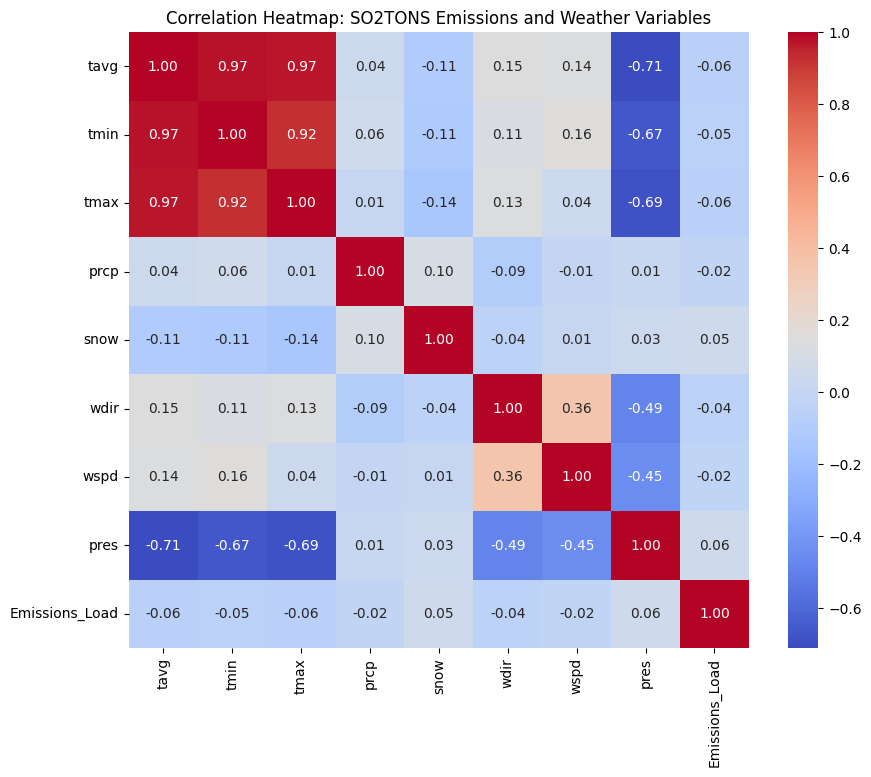


Feature Importances:
  Feature  Importance
6    wspd    0.233578
2    tmax    0.168250
7    pres    0.166356
5    wdir    0.161624
0    tavg    0.145878
1    tmin    0.106746
3    prcp    0.017191
4    snow    0.000376


<ipython-input-1-a0b11b198278>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


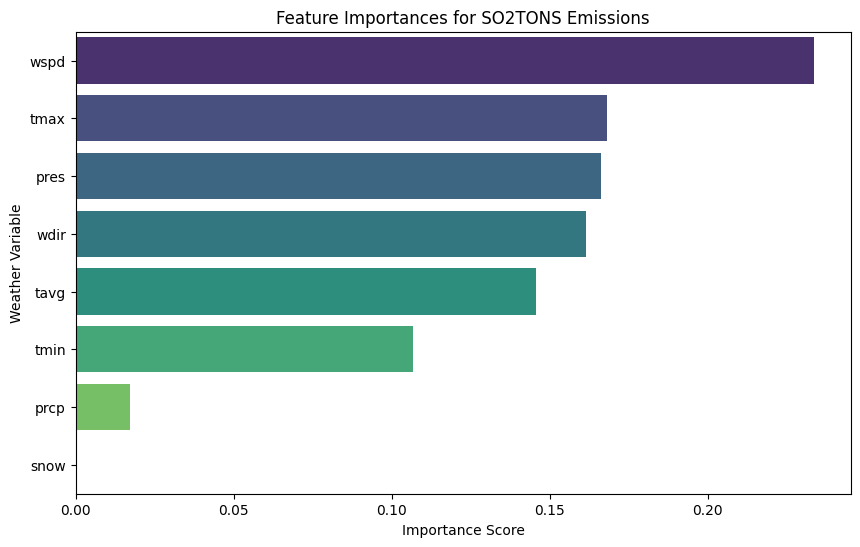


Analyzing NOXTONS Dataset

Correlation with Emissions_Load:
Emissions_Load    1.000000
pres              0.044929
wspd              0.011470
snow              0.006306
prcp             -0.010200
wdir             -0.030557
tmin             -0.034908
tavg             -0.036913
tmax             -0.039378
Name: Emissions_Load, dtype: float64


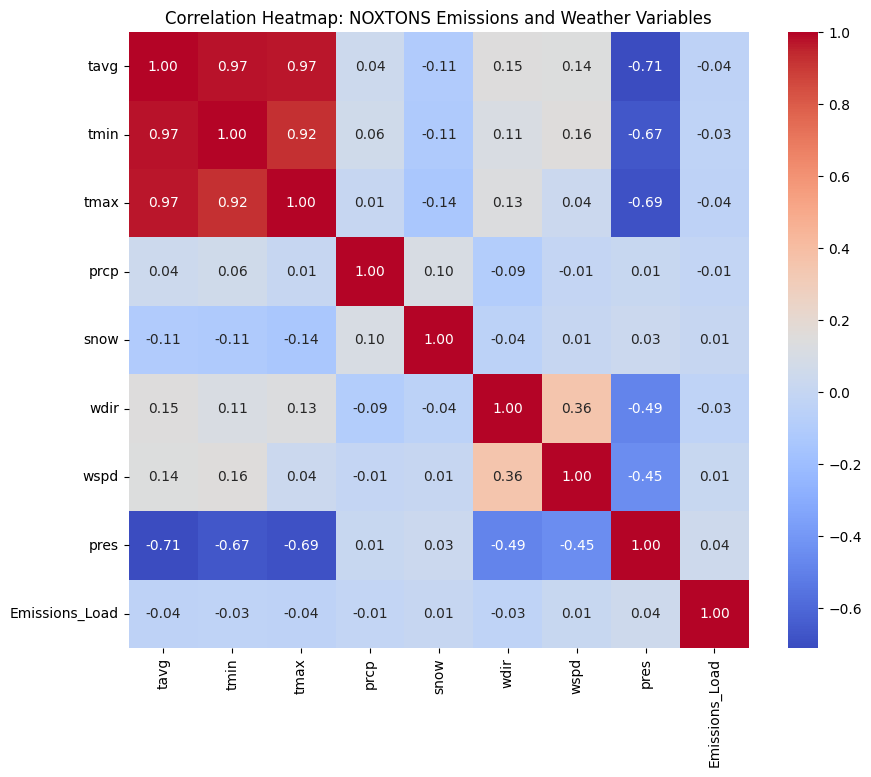


Feature Importances:
  Feature  Importance
6    wspd    0.329048
7    pres    0.254277
5    wdir    0.127889
0    tavg    0.115659
1    tmin    0.099502
2    tmax    0.069744
3    prcp    0.003846
4    snow    0.000035


<ipython-input-1-a0b11b198278>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


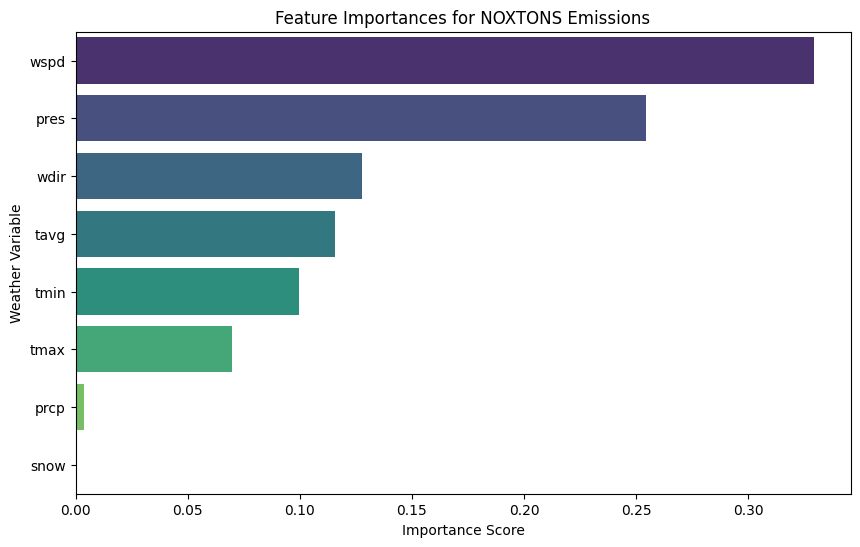


Analyzing COTONS Dataset

Correlation with Emissions_Load:
Emissions_Load    1.000000
pres              0.052174
wspd              0.010171
snow             -0.001227
prcp             -0.009512
wdir             -0.031018
tmin             -0.049409
tavg             -0.050756
tmax             -0.051454
Name: Emissions_Load, dtype: float64


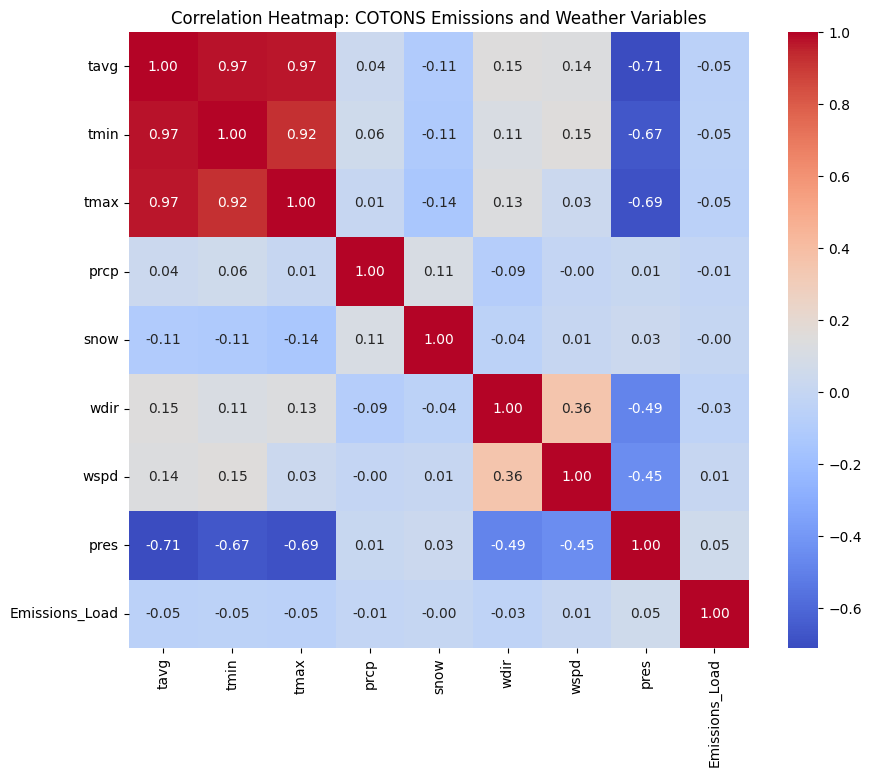


Feature Importances:
  Feature  Importance
6    wspd    0.294413
7    pres    0.219226
5    wdir    0.206357
0    tavg    0.126290
1    tmin    0.083955
2    tmax    0.065792
3    prcp    0.003963
4    snow    0.000005


<ipython-input-1-a0b11b198278>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


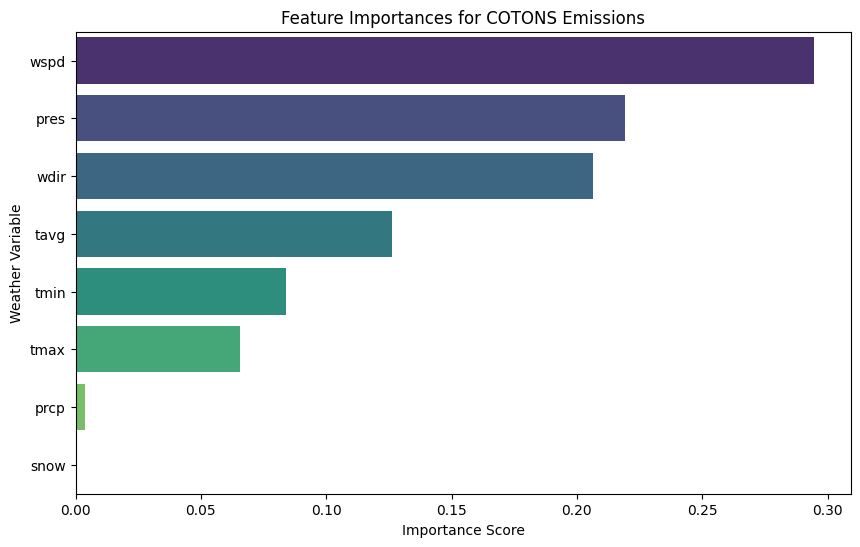

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Ensure plots display within the notebook
%matplotlib inline

# URLs for datasets
datasets = {
    "SO2TONS": "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/SO2TONS_dataset.csv",
    "NOXTONS": "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/NOXTONS_dataset.csv",
    "COTONS": "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/COTONS_dataset.csv"
}

# Loop through each dataset to perform analysis
for parameter, url in datasets.items():
    print(f"\nAnalyzing {parameter} Dataset")

    # Load the dataset
    data = pd.read_csv(url)

    # Convert 'date' column to datetime
    data['date'] = pd.to_datetime(data['date'])

    # Define predictors and target
    weather_features = ['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres']
    target = 'Emissions_Load'

    # Check if all required columns are present
    missing_cols = [col for col in weather_features + [target] if col not in data.columns]
    if missing_cols:
        print(f"Missing columns in {parameter} dataset: {missing_cols}. Skipping analysis for this dataset.")
        continue

    # Drop rows with missing values in predictors or target
    data = data.dropna(subset=weather_features + [target])

    # Ensure there is data left after dropping missing values
    if data.empty:
        print(f"No data available for {parameter} after dropping missing values. Skipping analysis for this dataset.")
        continue

    # Correlation Analysis
    correlation_matrix = data[weather_features + [target]].corr()
    correlation_with_target = correlation_matrix[target].sort_values(ascending=False)

    print("\nCorrelation with Emissions_Load:")
    print(correlation_with_target)

    # Display correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Heatmap: {parameter} Emissions and Weather Variables')
    plt.show()

    # Prepare data for Random Forest model
    X = data[weather_features]
    y = data[target]

    # Train Random Forest Model for Feature Importance
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)

    # Extract feature importances
    feature_importances = pd.DataFrame({
        'Feature': weather_features,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("\nFeature Importances:")
    print(feature_importances)

    # Display feature importance bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
    plt.title(f'Feature Importances for {parameter} Emissions')
    plt.xlabel('Importance Score')
    plt.ylabel('Weather Variable')
    plt.show()
